<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/affairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado

A atividade a ser desenvolvida no Colab deve conter as seguintes seções

>  Introdução
    - descreva os dados que serão analisados
    - detalhe qual será o foco do processo de classificação

> Regressão Logística
   - Apresentar a regressão logística simples para diferentes preditores
   - Sugestão de discussão: sinal do coeficiente de algum preditor mudou? Em caso afirmativo, apresente uma análise da motivação dessa modificação. Em caso negativo, análise o fato de poder remover algum dos preditores da regressão \múltipla e ainda continuar com um modelo aceitável.

   Individual: no mínimo 3 preditores
   Dupla: no mínimo 4 preditores
   Trio: no mínimo 5 preditores

   Justifique os preditores selecionados para iniciar a regressão logística 

> K-NN
   - Apresentar K-NN para diferentes combinações entre métrica e número de vizinhos
   - Sugestão de discussão: a influência do número de vizinhos é significativa? a métrica influencia os resultados?

   Individual: no mínimo 3 combinações
   Dupla: no mínimo 5 combinações
   Trio: no mínimo 7 combinações

> Árvore de decisão
   - Apresentar árvores de decisão para diferentes combinações entre profundidade e número máximo de folhas
   - Sugestão de discussão: qual a influência nos resultados quanto a número de folhas e profundidade?

   Individual: no mínimo 3 combinações
   Dupla: no mínimo 5 combinações
   Trio: no mínimo 7 combinações

> Floresta aleatória
   - Apresentar florestas aleatórias para diferentes combinações entre profundidade, número máximo de folhas, número de árvores e número de preditores
   - Faça análise do “out of bag error”
   - Sugestão de discussão: qual a influência nos resultados quanto a número de preditores?

   Individual: no mínimo 4 combinações
   Dupla: no mínimo 6 combinações
   Trio: no mínimo 8 combinações

> LDA
   - Apresentar LDA para diferentes threshold
   - Sugestão de discussão: há uma melhora com a variação do threshold?

   Individual: no mínimo 2 valores de threshold
   Dupla: no mínimo 3 valores de threshold
   Trio: no mínimo 4 valores de threshold

> SVM
   - Apresentar SVM para diferentes combinações de kernels, C e Gamma
   - Sugestão de discussão: qual a influência nos resultados quanto aos kenels, C e Gamma

   Individual: no mínimo 4 combinações
   Dupla: no mínimo 6 combinações
   Trio: no mínimo 8 combinações

> Comparação entre os modelos
   - além da comparação, apresente as vantagens e desvantagens nos algoritmos utilizados

> Conclusão, Considerações finais, Dificuldades e Desafios
   - os modelos de classificação abordados foram relevantes?
   - quais as dificuldades encontradas e desafios superados para o desenvolvimento da atividade

> Referência
   - artigos, livros, sites e outras fontes utilizadas 
   - seguir o padrão ABNT

ATENÇÃO
- TODAS as seções acima citadas devem estar presentes, seja no Colab ou em outro arquivo anexo (pdf, doc, ppt)
- TODO método de classificação deve ser acompanhado de discussão

# Base de Dados

A base de dados analisados indica um cadastro de mulheres com uma serie de atributos que tiveram um caso extra conjugal, identificado pela variavel **Had_Affair**. Veja detalhes dos demais campos abaixo.
- rate_marriage: nota de 1 a 5 para a satisfacao da mulher em seu casamento
- age: idade
- yrs_married: tempo de casada	
- children:	quantidade de filhos
- religious: nivel de religiosidade, sendo 1 nenhum e 5 maximo. 	
- educ: numero de anos de educacao formal
-	occupation:	profissao, sendo 1 = estudante, 2 = agricultura, 3 = executivo; 4 = professor; 5 = administrador; e 6 = profissional com grau avançado de estudo
- occupation_husb: profissao do marido	
- Had_Affair: label categorico, 0 ou 1, indicando se teve um caso ou nao

<img src="https://pbs.twimg.com/media/E4RVBnoWQAEm_yX?format=jpg&name=medium" alt="drawing" width="400"/>


In [1]:
import pandas as pd
df=pd.read_csv('http://quant-ibmec.group/data/affairs.csv')
df['Had_Affair'] = df['affair'].map({True:1,False:0})
df.drop(['Unnamed: 0','affair'],axis=1,inplace=True)
print(df.shape)
print(df['Had_Affair'].value_counts())
df.head()

(6366, 9)
0    4313
1    2053
Name: Had_Affair, dtype: int64


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


**Análise**

Vemos a estrutura dos dados e principalmente que as classes estao balancedas, sendo cerca de 2/3 da mulheres que nao tiveram um caso, 4313 e aproximadamente 1/3, 2053, que tiveram.

# Análise Inicial

Nesta secao vamos realizar uma analise previa da relacao de algumas variaveis antes mesmo de simular modelos nas secoes seguintes

Had_Affair     0    1
age                  
17.5         126   13
22.0        1394  406
27.0        1298  633
32.0         644  425
37.0         364  270
42.0         487  306


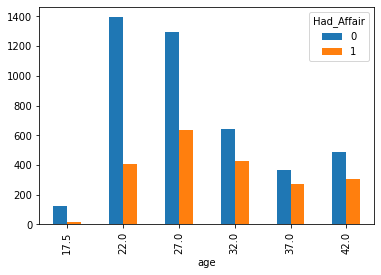

In [2]:

caso_por_idade = df.pivot_table(index='age', values='rate_marriage',columns='Had_Affair', aggfunc='count')
print(caso_por_idade)
caso_por_idade.plot(kind='bar')

**Análise**

Pelo gráfico de barras acima, temos a percepção que idade parece ser um fator de influência na classificação de traição, em particular para as mais jovens, de 17 a 27 anos sao MENOS propensos a trair. Para as idades acima de 27, a propensão se equilibra

Had_Affair      0    1
yrs_married           
0.5           354   16
2.5          1595  439
6.0           754  387
9.0           348  254
13.0          347  243
16.5          449  369
23.0          466  345


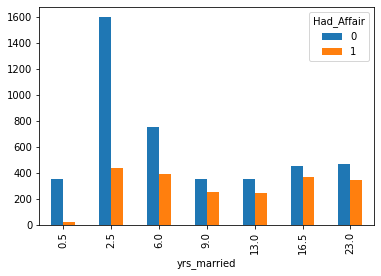

In [3]:
caso_por_idade = df.pivot_table(index='yrs_married', values='rate_marriage',columns='Had_Affair', aggfunc='count')
print(caso_por_idade)
caso_por_idade.plot(kind='bar')

**Análise**

Tempo de casada tambem parece ser um fator, as mulheres com menos tempos de casada, 2.5 a 6 anos parecem ser MENOS propensas se envolver em um caso extra conjugal. E para as casadas a mais de 6 anos a propensao se equilibra

Had_Affair     0    1
children             
0.0         1912  502
1.0          747  412
2.0          873  608
3.0          460  321
4.0          197  131
5.5          124   79


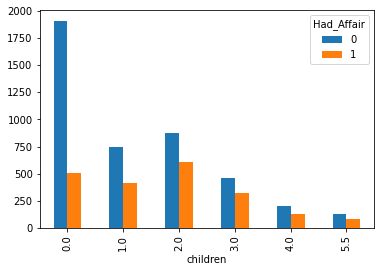

In [4]:
caso_por_idade = df.pivot_table(index='children', values='rate_marriage',columns='Had_Affair', aggfunc='count')
print(caso_por_idade)
caso_por_idade.plot(kind='bar')

**Análise**

O fato de ser uma familia ja com filhos parece ser um fator na inibição de traição. As mulheres que tem ao menos um filho tem uma propensão equivalente em ter ou nao ter um caso extra conjugal. Ja as mulheres sem filho tem um propensão muito MENOR com relação a traição. A hipotose inicial é que o casal sem filhos, foca sua atenção no relacionamento.

Had_Affair        0    1
rate_marriage           
1.0              25   74
2.0             127  221
3.0             446  547
4.0            1518  724
5.0            2197  487


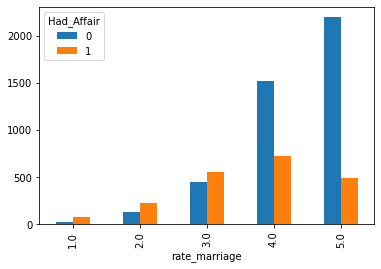

In [5]:
caso_por_nota = df.pivot_table(index='rate_marriage', values='children',columns='Had_Affair', aggfunc='count')
print(caso_por_nota)
caso_por_nota.plot(kind='bar')

**Análise**

Nota dada ao casamento eh a primeira feature que vemos efetivamente a tendência de traição superar a nao-traição, mais especificamente para os casos de notas <= a 3,0.

# Analise Estatistica

Dando sequencia nas analises preliminares, nesta secao vamos ver propriedades estatisticas de algumas variaveis como calculo de quartis e correlacoes

In [6]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,Had_Affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


**Analise** 

Aqui temos os calculos dos quartis a serem discutidos nos boxplots a seguir

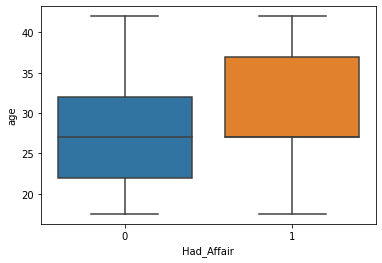

In [7]:
import seaborn as sns
sns.boxplot(data=df, y='age',x='Had_Affair')

**Análise**

Concentração de idade em quem tem affair é maior com o passar da idade.

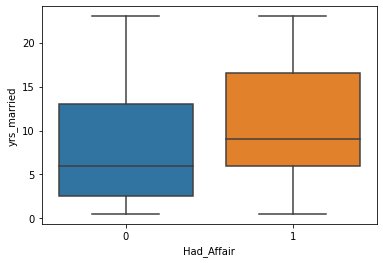

In [8]:
sns.boxplot(data=df, y='yrs_married',x='Had_Affair')

**Análise**

Vemos aqui a media de tempo de casado superior para as mulheres que tiveram um caso. Veremos que este junto com nota dada a casamento como os principais fatores que influenciam na traição.

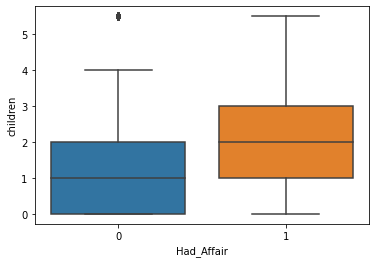

In [9]:
sns.boxplot(data=df, y='children',x='Had_Affair')

**Análise**

A quantidade de filhos também aparenta ser um fator, menos filhos menor a traição, mais filhos aumenta a propensão para traição.

count    4313.000000
mean        4.329701
std         0.821099
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rate_marriage, dtype: float64
count    2053.000000
mean        3.647345
std         1.065286
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: rate_marriage, dtype: float64


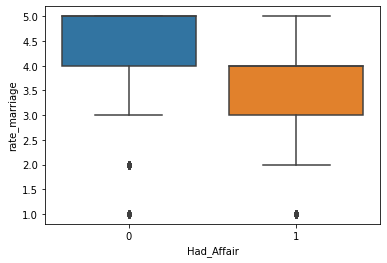

In [10]:
print(df[df['Had_Affair']==0]['rate_marriage'].describe())
print(df[df['Had_Affair']==1]['rate_marriage'].describe())
sns.boxplot(data=df, y='rate_marriage',x='Had_Affair')

**Análise**

Como podemos ver aqui, a nota dada ao casamento parece ser um fator. As mulheres que nao se envolveram em um caso extra conjugal, apresentam uma nota mediana de 5,0. Enquanto as que se envolveram, tem uma nota mediana de 4,0.

In [11]:
df[[	'rate_marriage',	'age',	'yrs_married',	'children',	'religious',	'educ']].corr()

,rate_marriage,age,yrs_married,children,religious,educ
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000


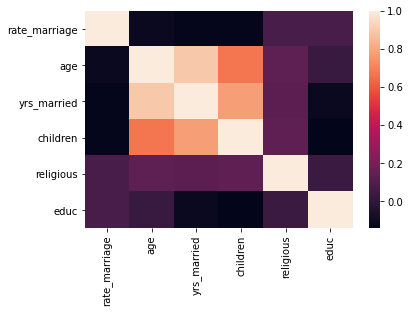

In [12]:
import seaborn as sns
sns.heatmap(df[[	'rate_marriage',	'age',	'yrs_married',	'children',	'religious',	'educ']].corr())

Observando as features discretas na tabela de correlacao acima e no respetivo mapa de calor, temos a percepcao que idade esta altamente relacionada com tempo de casamento e quantidade de filhos. Alem da quantidade de filhos estar correlacionada com tempo de casamento. Estes podem ser indicios para nao utilizar a variavel idade. Bem como talvez substituir a variavel quantidade de filhos para se tem filho ou nao.

# Data Engenieering

Nessa secao faremos um pre-processamento de dados para poder trabalhalos no modelos. Entre as operacoes faremos a transformacao de variaveis categoricas para variaveis dummies. Alem disso, criaremos a coluna de se tem filho ou nao. Por fim, faremos separacao dos dados de treino e teste

In [13]:
# Transformando features categoricas em colunas distintas (dummies), Occupation e Occupation_husb. 
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']
X = pd.concat([df,occ_dummies,hus_occ_dummies],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,Had_Affair,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [14]:
# Criacao da coluna se tem filhos
X['tem_filhos'] = X['children'] > 0
X['tem_filhos'] = X['tem_filhos'].map({True:1,False:0})

In [15]:

# Removendo o label, Had_Affair, features que nao serao usadas na previsao, como Occupation e Occupation_husb. 
# Bem como uma das dummies para evitar colineariedade entre features, occ1','hocc1
Xs = X.drop(['children','occupation','occupation_husb','Had_Affair','occ1','hocc1'],axis=1)
Xs.head()

,rate_marriage,age,yrs_married,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6,tem_filhos
0,3.0,32.0,9.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0,1
1,3.0,27.0,13.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0,1
2,4.0,22.0,2.5,1.0,16.0,0,1,0,0,0,0,0,0,1,0,0
3,4.0,37.0,16.5,3.0,16.0,0,0,0,1,0,0,0,0,1,0,1
4,5.0,27.0,9.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0,1


In [16]:
Y = df.Had_Affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [17]:
# Separacao dos dados de treino e teste
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix


X_train, X_test, Y_train, Y_test = train_test_split(Xs, Y) 

# Regressao Logistica

Vamos inicialmente criar uma Regressao Logistica com todas as variaveis, e na sequencia ir removendo as menos relevantes, uma de cada vez.

In [18]:
import statsmodels.api as sm
XX = sm.add_constant(Xs)

rl1 = sm.Logit(Y, XX).fit()
rl1.summary2().tables[1]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.540604
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,2.679728,0.576809,4.645784,3.387878e-06,1.549204,3.810253
rate_marriage,-0.694059,0.031580,-21.978133,4.662489e-107,-0.755954,-0.632164
age,-0.058084,0.010381,-5.595200,2.203678e-08,-0.078430,-0.037737
yrs_married,0.091918,0.010337,8.891811,6.012113e-19,0.071657,0.112179
religious,-0.383416,0.034930,-10.976657,4.948982e-28,-0.451878,-0.314954
educ,0.005239,0.017389,0.301285,7.631975e-01,-0.028843,0.039322
occ2,0.366616,0.450450,0.813887,4.157095e-01,-0.516250,1.249482
occ3,0.723502,0.444317,1.628345,1.034519e-01,-0.147344,1.594348
occ4,0.453069,0.445369,1.017289,3.090160e-01,-0.419838,1.325976
occ5,1.076255,0.449489,2.394396,1.664778e-02,0.195272,1.957237


**Analise**

Dado a alta correlacao da idade com outras variaveis como tempo de casamento, parece ter pouca relevancia, assim estamos removendo esta

In [19]:
XX.drop(['age'],axis=1, inplace=True)
rl2 = sm.Logit(Y, XX).fit()
rl2.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.543122
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,1.787707,0.551671,3.240532,1.193070e-03,0.706452,2.868962
rate_marriage,-0.687030,0.031457,-21.840282,9.615990e-106,-0.748684,-0.625375
yrs_married,0.041521,0.004995,8.313342,9.304408e-17,0.031732,0.051310
religious,-0.388403,0.034851,-11.144646,7.604574e-29,-0.456710,-0.320096
educ,-0.014347,0.016958,-0.846046,3.975271e-01,-0.047585,0.018890
occ2,0.321168,0.448376,0.716292,4.738113e-01,-0.557633,1.199969
occ3,0.673681,0.442217,1.523416,1.276547e-01,-0.193049,1.540411
occ4,0.392381,0.443172,0.885392,3.759453e-01,-0.476221,1.260983
occ5,1.012203,0.447287,2.262983,2.363674e-02,0.135536,1.888869
occ6,1.031058,0.493731,2.088297,3.677108e-02,0.063362,1.998754


**Analise** 

Percebemos entao que a ocupacao do marido tem pouca relevancia na analise, assim estamos removendo estas.

In [20]:
XX.drop(['hocc2','hocc3','hocc4','hocc5','hocc6'],axis=1, inplace=True)
rl3 = sm.Logit(Y, XX).fit()
rl3.summary2().tables[1]


Optimization terminated successfully.
         Current function value: 0.543219
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,1.853573,0.527623,3.513066,4.429674e-04,0.819452,2.887694
rate_marriage,-0.687890,0.031412,-21.899029,2.653728e-106,-0.749456,-0.626324
yrs_married,0.041683,0.004955,8.412695,4.006949e-17,0.031971,0.051394
religious,-0.387507,0.034822,-11.128263,9.139934e-29,-0.455757,-0.319258
educ,-0.015007,0.016640,-0.901870,3.671258e-01,-0.047620,0.017606
occ2,0.326269,0.446718,0.730370,4.651642e-01,-0.549282,1.201821
occ3,0.680681,0.440869,1.543953,1.225997e-01,-0.183406,1.544769
occ4,0.395243,0.441848,0.894522,3.710425e-01,-0.470763,1.261249
occ5,1.013346,0.445783,2.273184,2.301512e-02,0.139628,1.887065
occ6,1.034190,0.490932,2.106582,3.515383e-02,0.071980,1.996399


**Analise** 

Exceto as ocupacoes 5 (administradora) e 6 (alto grau de estudo) as demais profissioes da mulheres parece nao influenciar na propensao a trair.

In [21]:
XX.drop(['occ2','occ3','occ4'],axis=1, inplace=True)
rl4 = sm.Logit(Y, XX).fit()
rl4.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.545042
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,2.700955,0.252625,10.691566,1.114728e-26,2.205819,3.196090
rate_marriage,-0.692140,0.031374,-22.060696,7.541359e-108,-0.753633,-0.630647
yrs_married,0.042755,0.004940,8.654612,4.945933e-18,0.033073,0.052438
religious,-0.388420,0.034735,-11.182284,4.979195e-29,-0.456500,-0.320340
educ,-0.034646,0.014185,-2.442371,1.459115e-02,-0.062448,-0.006843
occ5,0.479644,0.087649,5.472309,4.442096e-08,0.307855,0.651434
occ6,0.575428,0.225780,2.548622,1.081495e-02,0.132907,1.017950
tem_filhos,0.418996,0.078601,5.330670,9.785098e-08,0.264941,0.573052


**Analise** 

Tempo de educacao tambem parace nao ser relevante. Assim, estou removendo estas.

In [22]:
XX.drop(['educ'],axis=1, inplace=True)
rl5 = sm.Logit(Y, XX).fit()
rl5.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.545514
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,2.217742,0.155584,14.254270,4.216857e-46,1.912802,2.522681
rate_marriage,-0.695589,0.031349,-22.188829,4.403139e-109,-0.757031,-0.634147
yrs_married,0.043219,0.004936,8.756506,2.013957e-18,0.033545,0.052892
religious,-0.390828,0.034681,-11.269075,1.865193e-29,-0.458803,-0.322854
occ5,0.481224,0.087554,5.496288,3.878695e-08,0.309621,0.652828
occ6,0.442404,0.219246,2.017844,4.360750e-02,0.012690,0.872118
tem_filhos,0.435128,0.078296,5.557473,2.737088e-08,0.281670,0.588585


**Analise** 

Parece que chegamos no modelo mais adequado utilizando nota ao casamento, tempo de casamento, nivel de religiosidade, as profissioes de administradora e alta educacao, e se tem filhos, como sendo as features primarias para a previsao do label se trai ou nao.

Na sequencias entao vamos re-treinar esse modelo final usando outra biblioteca, separando dados de treino e teste, e calculando as metricas de acuracia e MSE

Acuraria Treino 0.7214076246334311
Acuraria TESTE 0.7248743718592965
MSE Teste 0.2751256281407035
[[977 104]
 [334 177]]


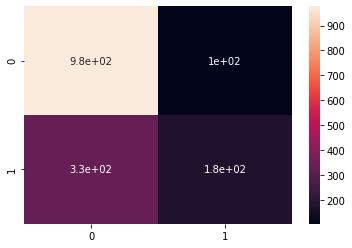

In [23]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix

rlog = LogisticRegression() 
rlog.fit(X_train[['rate_marriage','yrs_married','religious','occ5','occ6','tem_filhos']], Y_train)
score_train = rlog.score(X_train[['rate_marriage','yrs_married','religious','occ5','occ6','tem_filhos']], Y_train)
previsoes = rlog.predict(X_test[['rate_marriage','yrs_married','religious','occ5','occ6','tem_filhos']]) 
score_test = accuracy_score(Y_test,previsoes)
print('Acuraria Treino',score_train)
print('Acuraria TESTE',score_test)
print('MSE Teste',mean_squared_error(Y_test,previsoes))
cm = confusion_matrix(Y_test, previsoes)
print(cm)
sns.heatmap(cm,annot=True)

**Análise**

Podemos ver que tivemos uma acurácia superior a 70% tanto em treino quanto em teste na previsao das mulheres que tiveram um caso extra conjugal com base nas informacoes de qualidade do casamento, tempo de casada, idade, quantidade de filhos, nivel de reliogisidade, nivel educacional, alem da profissao dela e do marido.

# Regressao Logistica II

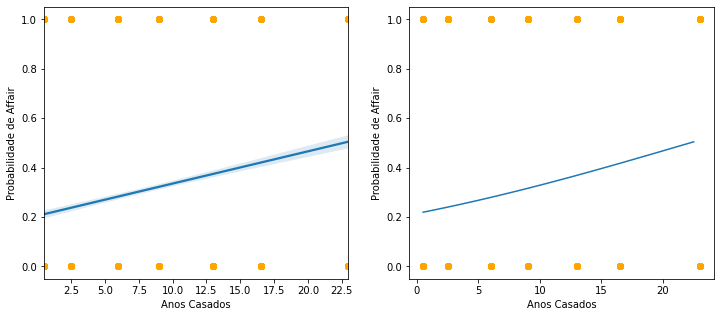

In [24]:
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
affairs=pd.read_csv('http://quant-ibmec.group/data/affairs.csv')

X_train = affairs.yrs_married.values.reshape(-1,1)
#print(X_train)
y = affairs.affair

X_test = np.arange(affairs.yrs_married.min(), affairs.yrs_married.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression()
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)



fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

sns.regplot(x="yrs_married", y="affair", data=affairs, ax=ax1, scatter_kws={'color':'orange'})

ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1])

for ax in fig.axes:
    ax.set_ylabel('Probabilidade de Affair')
    ax.set_xlabel('Anos Casados')




**Análise**

Aumenta a probabilidade com os anos de casado.

In [25]:
import statsmodels.api as sm
X_train = sm.add_constant(affairs.age)
est = sm.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1]



Optimization terminated successfully.
         Current function value: 0.618131
         Iterations 5


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-2.071481,0.119108,-17.391664,9.542299e-68,-2.304927,-1.838034
age,0.045155,0.003897,11.586809,4.807119e-31,0.037517,0.052793


In [26]:
X_train = sm.add_constant(affairs[['age', 'yrs_married', 'rate_marriage']])
y = affairs.affair
est = sm.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.556651
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,3.032377,0.249265,12.165270,4.758710e-34,2.543826,3.520928
age,-0.063218,0.009746,-6.486824,8.766445e-11,-0.082319,-0.044117
yrs_married,0.106243,0.009205,11.542467,8.058052e-31,0.088203,0.124284
rate_marriage,-0.727327,0.030956,-23.495828,4.499668e-122,-0.787999,-0.666655


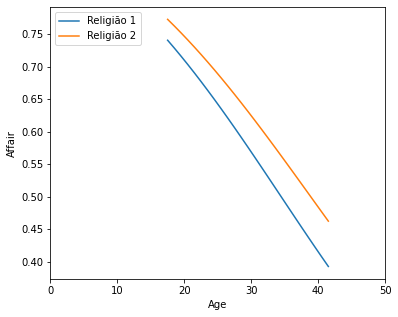

In [27]:
affairs['affair2'] = affairs.affair.factorize()[0]


X_train = affairs[affairs.religious==1.0].age.values.reshape(-1,1)
y = affairs[affairs.religious==1.0].affair2

##print(y)

X_train2 = affairs[affairs.religious==2.0].age.values.reshape(-1,1)
y2 = affairs[affairs.religious==2.0].affair2

#print(y2)

X_test = np.arange(affairs.age.min(), affairs.age.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression()
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)


clf2 = skl_lm.LogisticRegression()
clf2.fit(X_train2,y2)
prob2 = clf2.predict_proba(X_test)


fig, ax = plt.subplots(1,1, figsize=(6,5))

ax.plot(X_test, pd.DataFrame(prob)[1], label='Religião 1')
ax.plot(X_test, pd.DataFrame(prob2)[1], label='Religião 2')
ax.set_ylabel('Affair')
ax.set_xlabel('Age')

ax.set_xlim(0, 50)
ax.legend(loc=2)

**Análise**

Aparentemente a sacanagem rola indepedente da religiosidade. :)

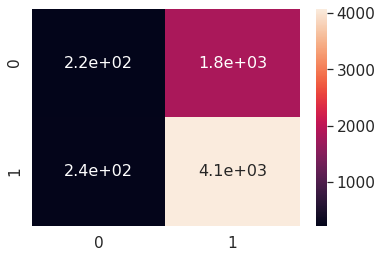

In [28]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

X_train = affairs[['children','age','religious']]
y = affairs.affair2

clf = skl_lm.LogisticRegression()
clf.fit(X_train,y)

y_pred = clf.predict(X_train)
cm = confusion_matrix(y,y_pred)

affairs_cm = pd.DataFrame(cm, range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(affairs_cm, annot=True, annot_kws={"size": 16})

# KNN

Vamos iniciar o KNN com um parametro de 3 vizinhos. E na sequencia vamos alterando esse hiperparametro e features selecionadas com base no que aprendemos na regressao logistica

Acuracia Treino 0.8167155425219942
Acuracia Teste 0.6758793969849246
MSE Teste 0.39824120603015073
[[848 199]
 [317 228]]


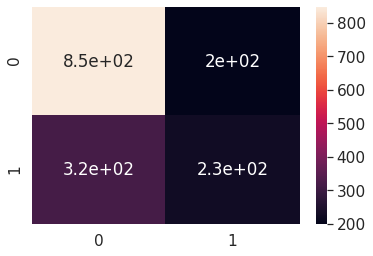

In [29]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Xs, Y) 

knn1 = KNeighborsClassifier(n_neighbors = 3 )
knn1.fit(X_train,Y_train)
print('Acuracia Treino',knn1.score(X_train,Y_train))
y_pred = knn1.predict(X_test)
print('Acuracia Teste',accuracy_score(Y_test,y_pred))
print('MSE Teste',mean_squared_error(Y_test,previsoes))
cm = confusion_matrix(Y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)

**Análise**

Neste primeiro KNN com 3 vizinhos tivemos uma acuracia de treino superior (81%) ao de teste (61%), o que apontar para um overfit. Vamos alterar o numero de vizinhos para observar o efeito

Acuracia Treino 0.7802681189777964
Acuracia Teste 0.6922110552763819
MSE Teste 0.39824120603015073
[[902 145]
 [345 200]]


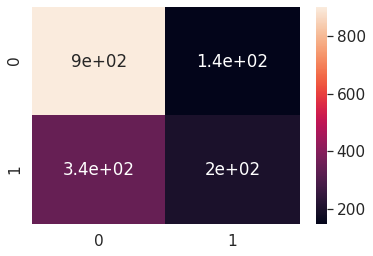

In [30]:

knn2 = KNeighborsClassifier(n_neighbors = 5 )
knn2.fit(X_train,Y_train)
print('Acuracia Treino',knn2.score(X_train,Y_train))
y_pred = knn2.predict(X_test)
print('Acuracia Teste',accuracy_score(Y_test,y_pred))
print('MSE Teste',mean_squared_error(Y_test,previsoes))
cm = confusion_matrix(Y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)

**Analise**

Aumentando o numero de vizinhos para 5, a acuracia de treino e teste se equilibram em torno de 70%, mantendo o MSE no mesmo patamar de 0.36. Vamos tentar agora alterar as features utilizadas, com base na regressao logistica

Acuracia Treino 0.7251780477586929
Acuracia Teste 0.6821608040201005
MSE Teste 0.39824120603015073
[[916 131]
 [375 170]]


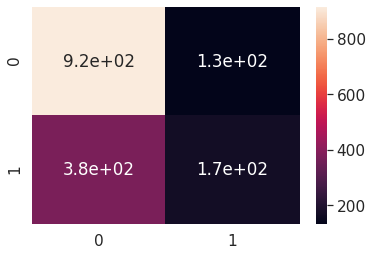

In [31]:

knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(X_train[['rate_marriage','yrs_married','religious','occ5','occ6','tem_filhos']],Y_train)
print('Acuracia Treino',knn.score(X_train[['rate_marriage','yrs_married','religious','occ5','occ6','tem_filhos']],Y_train))
y_pred = knn.predict(X_test[['rate_marriage','yrs_married','religious','occ5','occ6','tem_filhos']])
print('Acuracia Teste',accuracy_score(Y_test,y_pred))
print('MSE Teste',mean_squared_error(Y_test,previsoes))
cm = confusion_matrix(Y_test, y_pred)
print(cm)
sns.heatmap(cm,annot=True)

**Analise**

A selecao de features nao afetou significativamente a acuracia e MSE do KNN. Vamos por fim treinar o modelo novamente com todas as features e criar uma curva ROC para verificar se o nivel da probabilidade aceito melhora precisao x recall

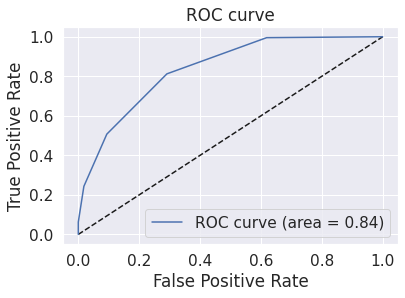

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_score_lr = knn.fit(X_train, Y_train).predict_proba(X_train)
fpr_lr, tpr_lr, _ = roc_curve(Y_train, y_score_lr[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Analise**

Alterando a probalidade aceita para classificar o individuo como positivo, podemos chegar em um equilibrio entre acuracia e recall, tendo mais de 60% de TP e cerca de 10% de FP. Ou ainda chegar a ter uma precisao perfeita, 100%, se dispor a ter uma maior taxa de FP, um pouco mais de 40%

# Árvore de Decisão

In [33]:
 !pip install graphviz

In [34]:
 !apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [35]:
import pandas as pd
affairs=pd.read_csv('http://quant-ibmec.group/data/affairs.csv')
#affairs['Had_Affair'] = affairs['affair'].map({True:'Trai',False:'Nao Trai'})
#affairs.dropna(inplace=True)
affairs.head(2)

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,True
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,True


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


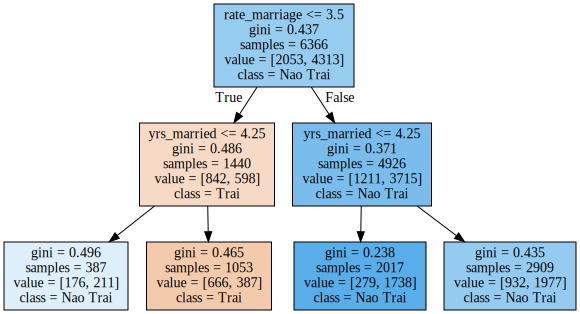

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydot
from IPython.display import Image
from graphviz import Source

X = affairs[[	'rate_marriage','age',	'yrs_married',	'children',	'religious',	'educ']]
y = pd.factorize(affairs['affair'])[0] 

tree1 = DecisionTreeClassifier(max_depth=2)
tree1.fit(X,y)

dot = export_graphviz(tree1, feature_names=[	'rate_marriage','age',	'yrs_married',	'children',	'religious',	'educ'], class_names=['Trai','Nao Trai'], filled=True)
Source(dot)

**Análise**

Se a mulher atribui uma nota para o casamento superior a 3,5, ela nao trai independetemente do tempo da relacao. Por outro lado, se o a nota eh inferior a 3,5, e o tempo de casamento eh superior a 4,25 anos, ela tende a trair. Mesmo com um nota baixa (< 3,5), tendo pouco tempo de casamento (< 4,5 anos) ela tende a nao trair 

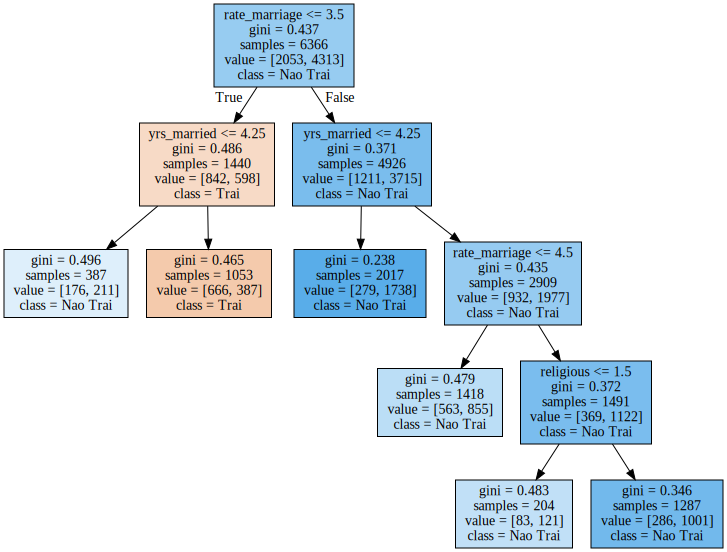

In [37]:
tree2 = DecisionTreeClassifier(max_leaf_nodes=6)
tree2.fit(X,y)
dot = export_graphviz(tree2, feature_names=[	'rate_marriage','age',	'yrs_married',	'children',	'religious',	'educ'], class_names=['Trai','Nao Trai'], filled=True)
Source(dot) 

**Análise**

Na primeira analise nos limitamos a profundidade 2, que gerou 4 folhas. Nesta analise, aumentamos para 6 folhas, o que nao trouxe nenhuma conclusao nova. Apesar do ramo a direita (nota para o casamento superior a 3.5) incluir agora a feature de religiao, esta aparece nao afetar a classificacao a respeita da propensao a traicao

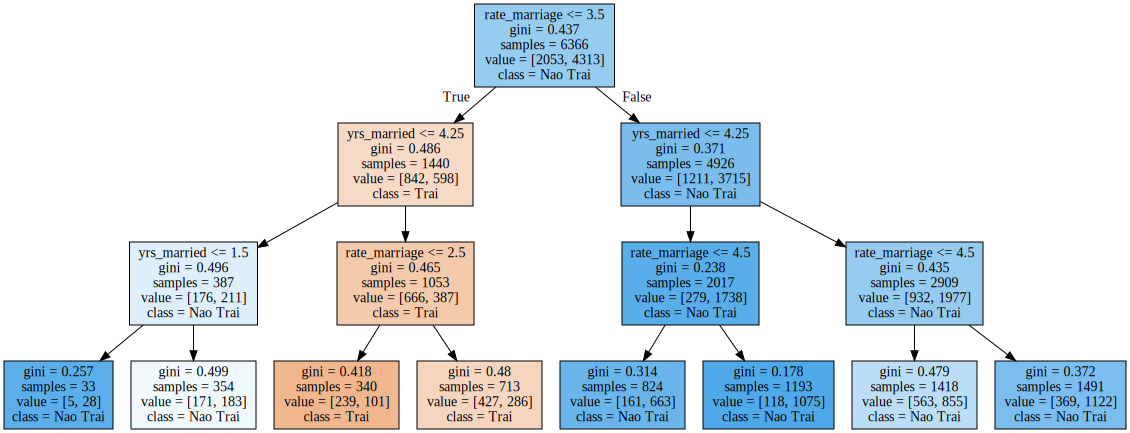

In [38]:
tree3 = DecisionTreeClassifier(max_depth=3)
tree3.fit(X,y)
dot = export_graphviz(tree3, feature_names=[	'rate_marriage','age',	'yrs_married',	'children',	'religious',	'educ'], class_names=['Trai','Nao Trai'], filled=True)
Source(dot) 

**Análise**

Trabalhando agora com um profundidade de arvore igual a 3, temos apenas a informacao adicional que casais com mais de 4,25 anos de casado e a nota ao relacionamento eh inferior a 3,5, entao eh certeza de traicao

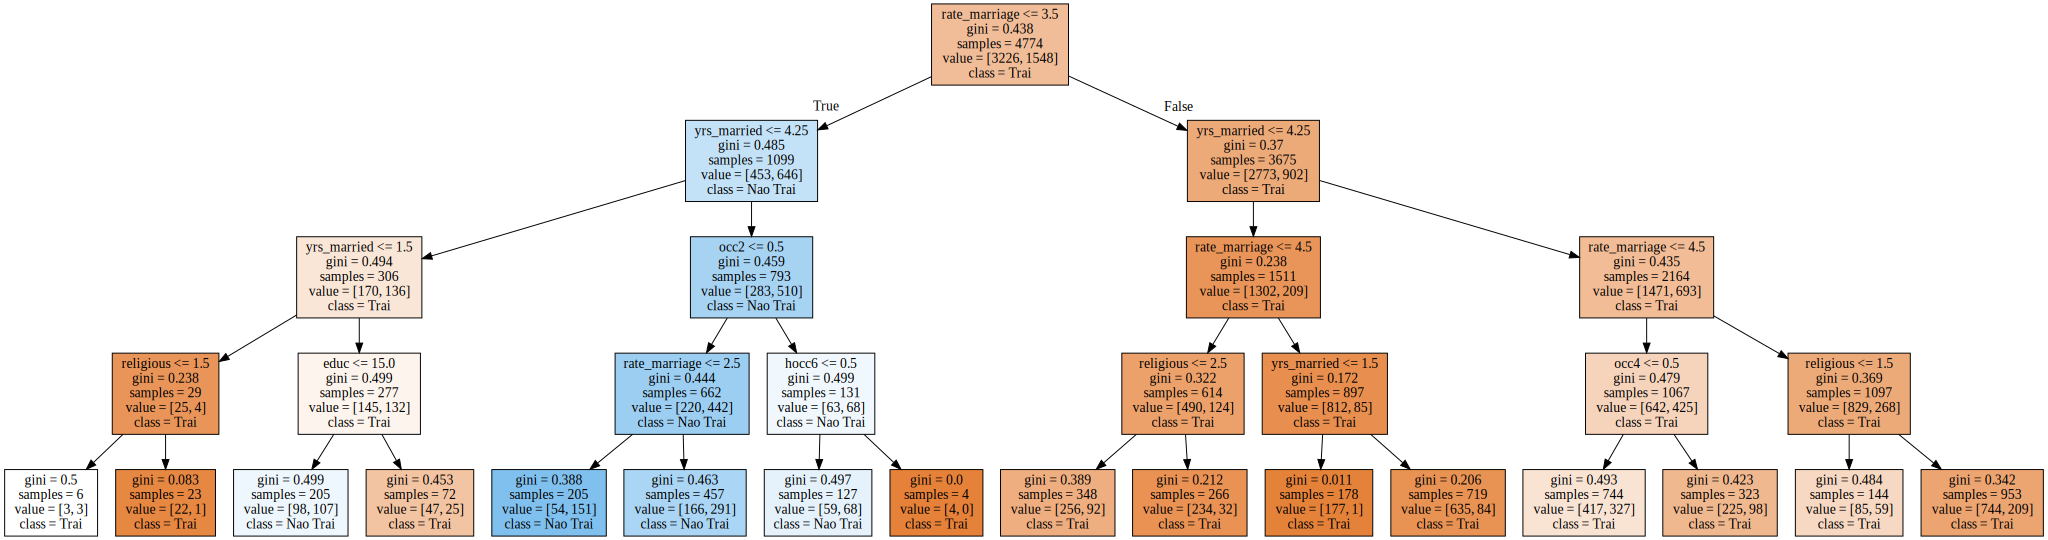

In [39]:
#, X_test, , Y_test = train_test_split(Xs, Y) 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xs, Y) 
tree = DecisionTreeClassifier( max_depth=4)
tree.fit(Xtrain,Ytrain)
dot = export_graphviz(tree, feature_names=['rate_marriage','age','yrs_married','religious','educ','occ2','occ3','occ4','occ5','occ6','hocc2','hocc3','hocc4','hocc5','hocc6','tem_filhos'], class_names=['Trai','Nao Trai'], filled=True)
Source(dot) 

**Análise**

Apos converter as variaveis categoricas de ocupacao da mulher, bem como a doo seu marido para dummy variables, reconstruímos a arvore com profundidade 3, tempo de casamento e nota para este continuam sendo as features primarias. 

Ao aprofundar para uma arvore de 4 niveis, vemos algumas situacoes especificas. Mulheres que atribuiem nota inferior a 3,5 ao casamento e com tempo de casada entre 1,5 e 4,25 anos, especificamente da profissao de admistradora tem menos propensao a trair em comparacao a outras profissoes.

Outra situacao sao mulheres com tempo de casamento superior a 4 anos com nota ao matrimonio inferior a 2,5, as que nao sao consideradas religiosas (grau de fe inferior a 3,5) tendem a trair menos do que as que se consideram mais religiosas.

Por fim, em um perfil parecido de longo tempo casamento e nota atribuido ao casamento entre 2,5 e 2,5, especificamente para profissao de agricultora tem mais tendencia a trai do que as demais profissoes.

Acuracia de Treino 0.7260159195643067
Acuracia de Test 0.710427135678392
MSE Teste 0.28957286432160806
[[955 132]
 [329 176]]


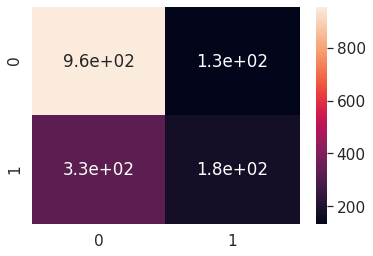

In [40]:
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

score_train = tree.score(Xtrain, Ytrain)
previsoes = tree.predict(Xtest)
score_test = accuracy_score(Ytest,previsoes)
print('Acuracia de Treino',score_train)
print('Acuracia de Test',score_test)
print('MSE Teste',mean_squared_error(Ytest,previsoes))

cm = confusion_matrix(Ytest, previsoes)
print(cm)
sns.heatmap(cm,annot=True)

**Análise**

Esta arvore aparesenta entao um desempenho equivalente tanto em treino quanto em teste, um pouco acima de 70%. O que proximos ao que vimos na Regressao Logistica e KNN

In [41]:
#import matplotlib.pyplot as plt
#pred=tree3.predict(X)
#plt.scatter(pred, y, label='medv')
#plt.plot([0,1],[0,1], '--k', transform=plt.gca().transAxes)
#plt.xlabel('pred')
#plt.ylabel('y_test')
Xs[['rate_marriage','yrs_married','religious','occ5','occ6','tem_filhos']].corr()


,rate_marriage,yrs_married,religious,occ5,occ6,tem_filhos
rate_marriage,1.000000,-0.128978,0.078794,-0.002109,0.008878,-0.168831
yrs_married,-0.128978,1.000000,0.132683,0.076820,-0.004912,0.613814
religious,0.078794,0.132683,1.000000,0.004260,0.011784,0.096127
occ5,-0.002109,0.076820,0.004260,1.000000,-0.047868,0.011727
occ6,0.008878,-0.004912,0.011784,-0.047868,1.000000,-0.024126
tem_filhos,-0.168831,0.613814,0.096127,0.011727,-0.024126,1.000000


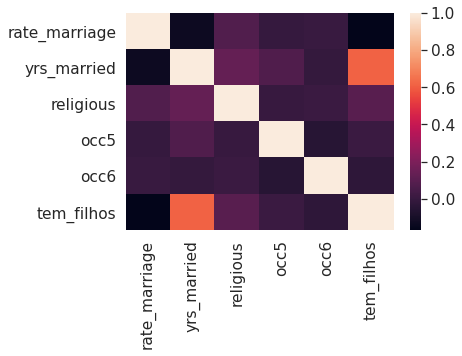

In [42]:
import seaborn as sns
sns.heatmap(Xs[['rate_marriage','yrs_married','religious','occ5','occ6','tem_filhos']].corr())

**Analise**

Caso voce tenha atentado, comparando as features do arvore de decisao com a regressao logistica, temos a ausencia da tem_filhos. Observe pela tabela e correlacao e mapa de calor acima, que ele esta altamente correlacionada com tempo de casamento.

# Random Forest

Vamos iniciar a floresta aleatoria com um numero maximo de features igual a 5, nas expectativa que as 5 principais que temos visto nos algoritmos anteriores sejam selecionadas: 'rate_marriage','yrs_married','religious','occ5','occ6' 

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
randtree1 = RandomForestClassifier(max_features=5)
randtree1.fit(X_train, y_train)
pred = randtree1.predict(X_test)
print('Acuracia Treino',randtree1.score(X_train, y_train))
print('Acuracia Teste',randtree1.score(X_test, y_test))
print('MSE',mean_squared_error(y_test, pred))


#plt.scatter(pred, y_test, label='medv')
#plt.plot([0,1],[0,1], '--k', transform=plt.gca().transAxes)
#plt.xlabel('pred')
#plt.ylabel('y_test')

Acuracia Treino 0.8364100549882169
Acuracia Teste 0.6789638932496075
MSE 0.32103610675039246


**Analise**

Chegamos no que parece ser um overfit, com acuracia de treino superior a 80% e a de teste da ordem de 70%. Vamos entao aumentar o numero de features para o maximo, 16.

In [44]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xs, Y) 
randtree2 = RandomForestClassifier(max_features=16 )
randtree2.fit(Xtrain, Ytrain)
pred = randtree2.predict(Xtest)
print('Acuracia Treino',randtree2.score(Xtrain, Ytrain))
print('Acuracia Teste',randtree2.score(Xtest, Ytest))
print('MSE Teste',mean_squared_error(Ytest, pred))


Acuracia Treino 0.922077922077922
Acuracia Teste 0.6765075376884422
MSE Teste 0.3234924623115578


**Analise**

Nessa condicao, o overfit piorou, tendo acuracia de treino superior a 90% e de teste de 67%. Vamos entrar entao com a selecao manual de atributos com base no que aprendamos nos modelos anteriores

Acuracia Treino 0.7419354838709677
Acuracia Teste 0.7091708542713567
MSE Teste 0.2908291457286432
[[863 213]
 [421  95]]


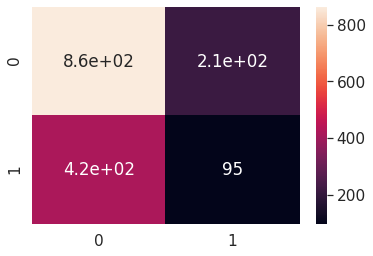

In [45]:
randt = RandomForestClassifier()
randt.fit(Xtrain[['rate_marriage','yrs_married','religious','occ5','occ6']], Ytrain)
pred = randt.predict(Xtest[['rate_marriage','yrs_married','religious','occ5','occ6']])
print('Acuracia Treino',randt.score(Xtrain[['rate_marriage','yrs_married','religious','occ5','occ6']], Ytrain))
print('Acuracia Teste',randt.score(Xtest[['rate_marriage','yrs_married','religious','occ5','occ6']], Ytest))
print('MSE Teste',mean_squared_error(Ytest, pred))
cm = confusion_matrix(Ytest, previsoes)
print(cm)
sns.heatmap(cm,annot=True)

**Analise**

Esse modelo entao parece ser mais equilibrado com acuracia de treino e teste proxima a 70%, o que seria patamar que vimos em outros algoritmos

# LDA





Vamos iniciar a anlise LDA com todas as feature, e comparar este com os demais modelos.

Acuraria Treino 0.7264348554671135
Acuraria TESTE 0.7298994974874372
MSE Teste 0.2701005025125628
[[963 112]
 [318 199]]


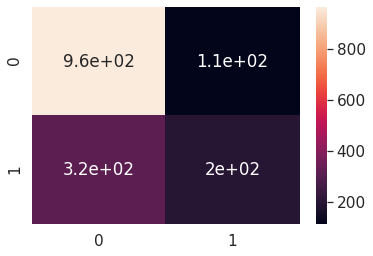

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

X_train, X_test, Y_train, Y_test = train_test_split(Xs, Y) 
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
score_train = lda.score(X_train, Y_train)
previsoes = lda.predict(X_test)
score_test = accuracy_score(Y_test,previsoes)
print('Acuraria Treino',score_train)
print('Acuraria TESTE',score_test)
print('MSE Teste',mean_squared_error(Y_test,previsoes))
cm = confusion_matrix(Y_test, previsoes)
print(cm)
sns.heatmap(cm,annot=True)

**Análise**

O classificador LDA presentou acurácia de teste e treino apenas um pouco melhor do que a Regressao Logistica. Pela matriz de confusao acima, se ve tambem que a melhora de Precisao e Recall tambem nao sao significativas

Acuraria TESTE 0.6765075376884422
[[1075    0]
 [ 515    2]]


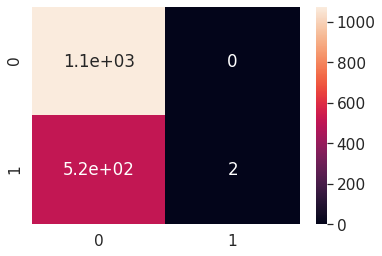

In [47]:
import seaborn as sns
decision_prob = 0.9
yprob = lda.fit(X_train, Y_train).predict_proba(X_test)
Y_prob = yprob[:,1]  > decision_prob
score_test = accuracy_score(Y_test,Y_prob)
print('Acuraria TESTE',score_test)
cm = confusion_matrix(Y_test,Y_prob)
print(cm)
sns.heatmap(cm,annot=True)

Acuraria TESTE 0.39886934673366836
[[124 951]
 [  6 511]]


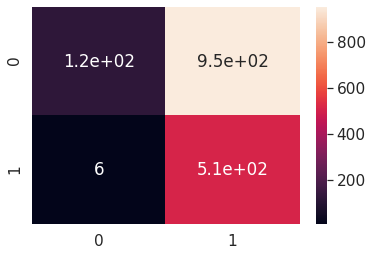

In [48]:
import seaborn as sns
decision_prob = 0.1
yprob = lda.fit(X_train, Y_train).predict_proba(X_test)
Y_prob = yprob[:,1]  > decision_prob
score_test = accuracy_score(Y_test,Y_prob)
print('Acuraria TESTE',score_test)
cm = confusion_matrix(Y_test,Y_prob)
print(cm)
sns.heatmap(cm,annot=True)

**Análise**

Alterando o limiar de probabilidade aceito na previsao, nao obtemos resultados melhores. Se colocamos esse limiar mais alto, exemplo 0.9, nao melhoramos acuracia. E apesar de aumentarmos os TNs, aumentamos tambem os FNs. Ao mesmo tempo, diminuimos os TPs. Em um cenario do limiar muito baixo, exemplo 0.1, baixamos a acuracia, juntamente com um aumento de TP acompanhado de um aumento de FP. Ao mesmo tempo diminuindo os TNs.

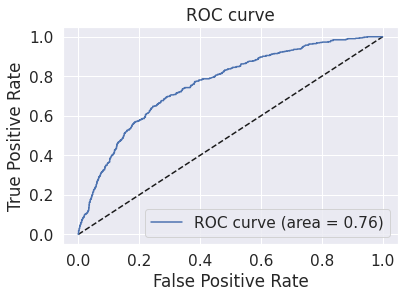

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_score_lr = lda.fit(X_train, Y_train).predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_score_lr[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

Analise

O equilibrio do LDA com base na propabilidade de classificacao positiva, parace ser um tarefa complexa. Se aceitarmos uma taxa inferior a 20% de FPs, atigiriamos no maximo uma taxa de TP de apenas 50%, o que seria o mesmo de um evento aleatorio. Para se chegar numa taxa de TP consistente de por exemplo superior a 80%, precisariamos aceitar uma taxa de FP superior a 40%

# SVM

Vamos inciar a analise com SVM linear, utilizando todas as features

Acuraria Treino 0.7249685798072895
Acuraria TESTE 0.7185929648241206
MSE Teste 0.2814070351758794
[[979  99]
 [349 165]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.81      1078
           1       0.62      0.32      0.42       514

    accuracy                           0.72      1592
   macro avg       0.68      0.61      0.62      1592
weighted avg       0.70      0.72      0.69      1592



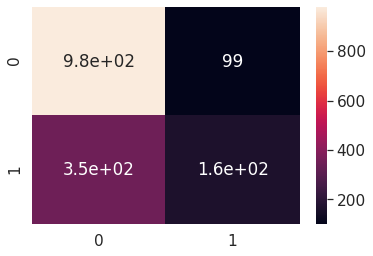

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import classification_report 

X_train, X_test, Y_train, Y_test = train_test_split(Xs, Y) 
svclin = SVC(kernel = 'linear')
svclin.fit(X_train, Y_train)
score_train = svclin.score(X_train, Y_train)
previsoes = svclin.predict(X_test)
score_test = accuracy_score(Y_test,previsoes)
print('Acuraria Treino',score_train)
print('Acuraria TESTE',score_test)
print('MSE Teste',mean_squared_error(Y_test,previsoes))
cm = confusion_matrix(Y_test, previsoes)
print(cm)
print(classification_report(Y_test, previsoes))
sns.heatmap(cm,annot=True)

**Análise**

O SVM com um kernel linear apresentaram uma acurácia equivalente a outros modelos como Regressão Logística e Arvore de decisao. Vamos analisar detalhadamente estes numeros na utlima secao deste documento, realizando uma validacao cruzada.


Acuraria Treino 0.7073732718894009
Acuraria TESTE 0.7167085427135679
MSE Teste 0.2832914572864322
[[1041   37]
 [ 414  100]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.82      1078
           1       0.73      0.19      0.31       514

    accuracy                           0.72      1592
   macro avg       0.72      0.58      0.56      1592
weighted avg       0.72      0.72      0.66      1592



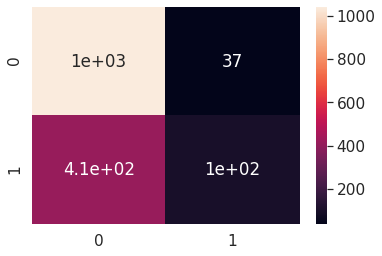

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report 

svc = SVC()
svc.fit(X_train , Y_train)
score_train = svc.score(X_train , Y_train)
previsoes = svc.predict(X_test )
score_test = accuracy_score(Y_test,previsoes)
print('Acuraria Treino',score_train)
print('Acuraria TESTE',score_test)
print('MSE Teste',mean_squared_error(Y_test,previsoes))
cm = confusion_matrix(Y_test, previsoes)
print(cm)
print(classification_report(Y_test, previsoes)) 
sns.heatmap(cm,annot=True)

**Analise** 

Apesar da acuracia de teste ter piorado um pouco do SVC linear para o nao linear, de 69% para 67%. Bem como o MSE tabem ter piorada um pouco, de 30% a 32%, a precisao melhorou, de 64% para 71%. Opostamente a isto o recall piorou, de 29% para 13%. Desta maneira o SCV nao linear tem uma taxa de FN muito alta.  

# Cross Validation

Nesta secao vamos comparar os MSEs, realizando uma validacao estatistica para cada um dos 6 algoritmos, utilizando como base o melhor de cada um deles: Regressao Logistica, KNN, Arvore de decisao, Floresta randomica, LDA e SVM

In [52]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# Comparando classficadores  Regressao Logistica, KNN, Arvore de decisao, Floresta randomica, LDA e SVM
modelos=[ 'RegLog','KNN','Tree','F.Rand','LDA','SVM']
classsifiers = [rlog,knn,tree,randt,lda,svclin]

n_splits = 10 
n_models = len(classsifiers)
#Scores linhas = num rodadas e cols = cada modelo
scores = np.zeros( (n_splits,n_models) )
#Diff Score linha x col = modelo x modelo e z = rodada
diff_scores = np.zeros( (n_models,n_models,n_splits) )
#Medias diffs linha x col = modelo x modelo
diff_scores_avgs = np.zeros( (n_models,n_models) )
#PValue diffs linha x col = modelo x modelo
p_is = np.zeros( (n_models,n_models) )


folds = KFold(n_splits=n_splits, shuffle=True)
for rodada, (trn_idx, val_idx) in enumerate(folds.split(Xs, Y)):

  print('##### Rodada #',rodada)
  #Separacao em treino e teste da rodada
  trn_x, trn_y = Xs.iloc[trn_idx], Y.iloc[trn_idx]
  val_x, val_y = Xs.iloc[val_idx], Y.iloc[val_idx]
  
  #Calculo dos scores p cada modelo
  for c in range(n_models):
    classif = classsifiers[c]
    classif.fit(trn_x, trn_y)
    preds = classif.predict(val_x)
    scores[rodada,c] =  mean_squared_error(val_y, preds)
    #scores[rodada,c] = accuracy_score(Y_test,previsoes)
    print(scores[rodada,c] )
  
  #Calculo da matriz modelo x modelo da diferenca de score (z=rodada)
  for ci in range(n_models):
    for cj in range(n_models):
      diff_scores[ci,cj,rodada] = scores[rodada,ci] - scores[rodada,cj]
      #print(ci,cj,scores[rodada,ci] - scores[rodada,cj])
  
  print("DIFF") 
  print(diff_scores[:,:,rodada])

# Compute t value
for ci in range(n_models):
  for cj in range(n_models): 
    diff_scores_avgs[ci,cj] = np.mean(diff_scores[ci,cj,:])
    centered_diff = np.array(diff_scores[ci,cj,:]) - diff_scores_avgs[ci,cj]
    p_is[ci,cj] = diff_scores_avgs[ci,cj] * (n_splits ** .5) / (np.sqrt(np.sum(centered_diff ** 2) / (n_splits - 1)))


##### Rodada # 0
0.24489795918367346
0.29199372056514916
0.2621664050235479


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.282574568288854
0.23547880690737832
0.24646781789638933
DIFF
[[ 0.         -0.04709576 -0.01726845 -0.03767661  0.00941915 -0.00156986]
 [ 0.04709576  0.          0.02982732  0.00941915  0.05651491  0.0455259 ]
 [ 0.01726845 -0.02982732  0.         -0.02040816  0.0266876   0.01569859]
 [ 0.03767661 -0.00941915  0.02040816  0.          0.04709576  0.03610675]
 [-0.00941915 -0.05651491 -0.0266876  -0.04709576  0.         -0.01098901]
 [ 0.00156986 -0.0455259  -0.01569859 -0.03610675  0.01098901  0.        ]]
##### Rodada # 1
0.27629513343799056
0.3281004709576138
0.2904238618524333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3076923076923077
0.27001569858712715
0.28100470957613816
DIFF
[[ 0.         -0.05180534 -0.01412873 -0.03139717  0.00627943 -0.00470958]
 [ 0.05180534  0.          0.03767661  0.02040816  0.05808477  0.04709576]
 [ 0.01412873 -0.03767661  0.         -0.01726845  0.02040816  0.00941915]
 [ 0.03139717 -0.02040816  0.01726845  0.          0.03767661  0.0266876 ]
 [-0.00627943 -0.05808477 -0.02040816 -0.03767661  0.         -0.01098901]
 [ 0.00470958 -0.04709576 -0.00941915 -0.0266876   0.01098901  0.        ]]
##### Rodada # 2
0.271585557299843
0.34379905808477235
0.271585557299843


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3139717425431711
0.2731554160125589
0.27001569858712715
DIFF
[[ 0.         -0.0722135   0.         -0.04238619 -0.00156986  0.00156986]
 [ 0.0722135   0.          0.0722135   0.02982732  0.07064364  0.07378336]
 [ 0.         -0.0722135   0.         -0.04238619 -0.00156986  0.00156986]
 [ 0.04238619 -0.02982732  0.04238619  0.          0.04081633  0.04395604]
 [ 0.00156986 -0.07064364  0.00156986 -0.04081633  0.          0.00313972]
 [-0.00156986 -0.07378336 -0.00156986 -0.04395604 -0.00313972  0.        ]]
##### Rodada # 3
0.2904238618524333
0.29356357927786497
0.28100470957613816


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3328100470957614
0.29356357927786497
0.2967032967032967
DIFF
[[ 0.         -0.00313972  0.00941915 -0.04238619 -0.00313972 -0.00627943]
 [ 0.00313972  0.          0.01255887 -0.03924647  0.         -0.00313972]
 [-0.00941915 -0.01255887  0.         -0.05180534 -0.01255887 -0.01569859]
 [ 0.04238619  0.03924647  0.05180534  0.          0.03924647  0.03610675]
 [ 0.00313972  0.          0.01255887 -0.03924647  0.         -0.00313972]
 [ 0.00627943  0.00313972  0.01569859 -0.03610675  0.00313972  0.        ]]
##### Rodada # 4
0.25902668759811615
0.282574568288854
0.2731554160125589


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3092621664050236
0.260596546310832
0.2668759811616955
DIFF
[[ 0.         -0.02354788 -0.01412873 -0.05023548 -0.00156986 -0.00784929]
 [ 0.02354788  0.          0.00941915 -0.0266876   0.02197802  0.01569859]
 [ 0.01412873 -0.00941915  0.         -0.03610675  0.01255887  0.00627943]
 [ 0.05023548  0.0266876   0.03610675  0.          0.04866562  0.04238619]
 [ 0.00156986 -0.02197802 -0.01255887 -0.04866562  0.         -0.00627943]
 [ 0.00784929 -0.01569859 -0.00627943 -0.04238619  0.00627943  0.        ]]
##### Rodada # 5
0.27472527472527475
0.28885400313971743
0.29199372056514916


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3108320251177394
0.28100470957613816
0.29513343799058084
DIFF
[[ 0.         -0.01412873 -0.01726845 -0.03610675 -0.00627943 -0.02040816]
 [ 0.01412873  0.         -0.00313972 -0.02197802  0.00784929 -0.00627943]
 [ 0.01726845  0.00313972  0.         -0.0188383   0.01098901 -0.00313972]
 [ 0.03610675  0.02197802  0.0188383   0.          0.02982732  0.01569859]
 [ 0.00627943 -0.00784929 -0.01098901 -0.02982732  0.         -0.01412873]
 [ 0.02040816  0.00627943  0.00313972 -0.01569859  0.01412873  0.        ]]
##### Rodada # 6
0.30345911949685533
0.2830188679245283
0.2720125786163522


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3081761006289308
0.2940251572327044
0.28144654088050314
DIFF
[[ 0.          0.02044025  0.03144654 -0.00471698  0.00943396  0.02201258]
 [-0.02044025  0.          0.01100629 -0.02515723 -0.01100629  0.00157233]
 [-0.03144654 -0.01100629  0.         -0.03616352 -0.02201258 -0.00943396]
 [ 0.00471698  0.02515723  0.03616352  0.          0.01415094  0.02672956]
 [-0.00943396  0.01100629  0.02201258 -0.01415094  0.          0.01257862]
 [-0.02201258 -0.00157233  0.00943396 -0.02672956 -0.01257862  0.        ]]
##### Rodada # 7
0.26572327044025157
0.28773584905660377
0.2672955974842767


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3238993710691824
0.2562893081761006
0.25943396226415094
DIFF
[[ 0.         -0.02201258 -0.00157233 -0.0581761   0.00943396  0.00628931]
 [ 0.02201258  0.          0.02044025 -0.03616352  0.03144654  0.02830189]
 [ 0.00157233 -0.02044025  0.         -0.05660377  0.01100629  0.00786164]
 [ 0.0581761   0.03616352  0.05660377  0.          0.06761006  0.06446541]
 [-0.00943396 -0.03144654 -0.01100629 -0.06761006  0.         -0.00314465]
 [-0.00628931 -0.02830189 -0.00786164 -0.06446541  0.00314465  0.        ]]
##### Rodada # 8
0.26257861635220126
0.3238993710691824
0.2861635220125786


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3018867924528302
0.2641509433962264
0.28144654088050314
DIFF
[[ 0.         -0.06132075 -0.02358491 -0.03930818 -0.00157233 -0.01886792]
 [ 0.06132075  0.          0.03773585  0.02201258  0.05974843  0.04245283]
 [ 0.02358491 -0.03773585  0.         -0.01572327  0.02201258  0.00471698]
 [ 0.03930818 -0.02201258  0.01572327  0.          0.03773585  0.02044025]
 [ 0.00157233 -0.05974843 -0.02201258 -0.03773585  0.         -0.0172956 ]
 [ 0.01886792 -0.04245283 -0.00471698 -0.02044025  0.0172956   0.        ]]
##### Rodada # 9
0.3081761006289308
0.3238993710691824
0.29245283018867924


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3238993710691824
0.300314465408805
0.2893081761006289
DIFF
[[ 0.         -0.01572327  0.01572327 -0.01572327  0.00786164  0.01886792]
 [ 0.01572327  0.          0.03144654  0.          0.02358491  0.03459119]
 [-0.01572327 -0.03144654  0.         -0.03144654 -0.00786164  0.00314465]
 [ 0.01572327  0.          0.03144654  0.          0.02358491  0.03459119]
 [-0.00786164 -0.02358491  0.00786164 -0.02358491  0.          0.01100629]
 [-0.01886792 -0.03459119 -0.00314465 -0.03459119 -0.01100629  0.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


In [63]:
print('Diferencas medias de MSE')
diff_scores_avgs_df=pd.DataFrame(diff_scores_avgs)
diff_scores_avgs_df.columns = modelos
diff_scores_avgs_df.index = modelos
diff_scores_avgs_df

Diferencas medias de MSE


,RegLog,KNN,Tree,F.Rand,LDA,SVM
RegLog,0.000000,-0.029055,-0.003136,-0.035811,0.002830,-0.001094
KNN,0.029055,0.000000,0.025918,-0.006757,0.031884,0.027960
Tree,0.003136,-0.025918,0.000000,-0.032675,0.005966,0.002042
F.Rand,0.035811,0.006757,0.032675,0.000000,0.038641,0.034717
LDA,-0.002830,-0.031884,-0.005966,-0.038641,0.000000,-0.003924
SVM,0.001094,-0.027960,-0.002042,-0.034717,0.003924,0.000000


Na sequencia vamos analisar a estatistica t para um nivel de confianca de 95%, vemos que valores de t > 2.26 ou < -2.26 pode-se rejeitar Ho. No nosso caso Ho, indica que nao existe diferenca entre o nivel de acuracia entre nossos modelos

2.2621571627409915


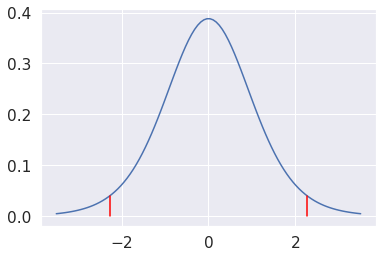

In [54]:
from scipy.stats import t as t_student
import matplotlib.pyplot as plt
graus_de_liberdade = n_splits-1
xs=np.linspace(-3.5,3.5,100) 
plt.plot( xs,t_student.pdf(xs,graus_de_liberdade) )
sig = 0.05
confianca = 1 - sig/2
prob = confianca + sig
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
plt.plot([t_alpha,t_alpha],[0,t_student.pdf(t_alpha,graus_de_liberdade) ],color='red')
plt.plot([-t_alpha,-t_alpha],[0,t_student.pdf(t_alpha,graus_de_liberdade) ],color='red')
print(t_alpha)


In [55]:
print(p_is)
sigstat = pd.DataFrame(np.bitwise_or((p_is > t_alpha) , (p_is < -t_alpha)))
sigstat.columns = modelos
sigstat.index = modelos
sigstat

[[        nan -3.21540198 -0.56421767 -7.24259049  1.44616918 -0.24687914]
 [ 3.21540198         nan  3.88077072 -0.82075242  3.57150791  3.42019461]
 [ 0.56421767 -3.88077072         nan -7.06521039  1.16418454  0.69597086]
 [ 7.24259049  0.82075242  7.06521039         nan  8.36131597  7.92570607]
 [-1.44616918 -3.57150791 -1.16418454 -8.36131597         nan -1.21768624]
 [ 0.24687914 -3.42019461 -0.69597086 -7.92570607  1.21768624         nan]]


,RegLog,KNN,Tree,F.Rand,LDA,SVM
RegLog,False,True,False,True,False,False
KNN,True,False,True,False,True,True
Tree,False,True,False,True,False,False
F.Rand,True,False,True,False,True,True
LDA,False,True,False,True,False,False
SVM,False,True,False,True,False,False


In [56]:
scores_df =pd.DataFrame(scores)
scores_df.columns  = modelos
print('Medias de MSE')
pd.DataFrame(scores_df.mean()).T


Medias de MSE


,RegLog,KNN,Tree,F.Rand,LDA,SVM
0,0.275689,0.304744,0.278825,0.3115,0.272859,0.276784


**CONCLUSAO FINAL**

*Os melhores modelos paracem ser Regressao Logistica, Arvore de Descisao, LDA e SVM, com MSE da ordem de 0.27 e sem diferenca estatatiscamente significativa entre eles. Os que obtiveram um MSE pior, supoerior a 0.30 foram o KNN e a Floresta Randomica.* 

In [57]:
print('Historico (por fold) de Medias dos MSEs')
scores_df

Historico (por fold) de Medias dos MSEs


,RegLog,KNN,Tree,F.Rand,LDA,SVM
0,0.244898,0.291994,0.262166,0.282575,0.235479,0.246468
1,0.276295,0.328100,0.290424,0.307692,0.270016,0.281005
2,0.271586,0.343799,0.271586,0.313972,0.273155,0.270016
3,0.290424,0.293564,0.281005,0.332810,0.293564,0.296703
4,0.259027,0.282575,0.273155,0.309262,0.260597,0.266876
5,0.274725,0.288854,0.291994,0.310832,0.281005,0.295133
6,0.303459,0.283019,0.272013,0.308176,0.294025,0.281447
7,0.265723,0.287736,0.267296,0.323899,0.256289,0.259434
8,0.262579,0.323899,0.286164,0.301887,0.264151,0.281447
9,0.308176,0.323899,0.292453,0.323899,0.300314,0.289308


# Apendice

[[1 4]
 [2 3]]
     prev_0  prev_1
y_0       1       4
y_1       2       3
col_0  0  1
row_0      
0      1  4
1      2  3


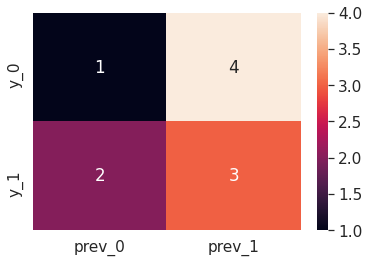

In [58]:

from pandas import DataFrame, crosstab, Series
yy=[0,0,0,0,0,1,1,1,1,1]
pp=[1,1,1,1,0,1,1,1,0,0]
print(confusion_matrix(yy, pp))
cm=DataFrame(confusion_matrix(yy, pp))
cm.columns=['prev_0','prev_1']
cm.index = ['y_0','y_1']
print(cm)
print(crosstab(Series(yy),Series(pp)))
sns.heatmap(cm,annot=True)

In [59]:
cm.iloc[1,1]/(cm.iloc[1,1]+cm.iloc[0,1])

0.42857142857142855

In [60]:
cm.iloc[1,1]/(cm.iloc[1,1]+cm.iloc[1,0])

0.6

In [61]:
from sklearn.metrics import classification_report 
print(classification_report(yy,pp)) 

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.43      0.60      0.50         5

    accuracy                           0.40        10
   macro avg       0.38      0.40      0.38        10
weighted avg       0.38      0.40      0.38        10

